In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
import sklearn.linear_model

np.random.seed(0)

# Question 1

*Load the data from data_tp_2.csv. Plot the median and standard deviation of every covariate in a single plot. Is the data centered? Normalized? Standardized?*

In [2]:
path = "./data_tp_2.csv"
data = pd.read_csv(path, sep=',')
data

,X76,X95,X52,X36,X74,X69,X23,X27,X19,X39,...,X45,X67,X16,X37,X56,X35,X87,X89,X96,Y
0,-0.208298,0.793446,-0.200865,-0.005766,-0.336092,0.037238,0.148319,-1.423624,-0.411594,0.541975,...,-0.216825,0.552672,0.499400,0.134669,-1.639742,-0.004640,-0.635006,-0.758949,0.488324,24.0
1,-0.221028,-0.363311,-0.631604,1.152664,-0.532182,1.176513,-0.100142,1.170051,0.360931,0.593115,...,0.571930,-0.186832,-0.238081,1.404931,0.489104,0.248675,0.361039,0.435418,-1.324025,21.6
2,-1.059124,-0.777557,-0.172609,0.767116,0.141027,0.677921,0.820292,-0.255193,0.691621,0.254366,...,-0.643929,-0.543850,-0.478493,-0.386637,0.175114,-0.658092,-0.338583,-0.177981,-0.050339,34.7
3,1.133450,-0.790638,-0.586627,0.942378,0.283674,-0.577118,-0.145977,-0.263209,1.435926,-0.750034,...,0.719154,0.056236,-0.495367,0.204324,-1.078683,0.640999,-0.921276,-0.602238,0.421393,33.4
4,0.908181,-0.913293,0.362265,-0.437131,0.514517,-1.625222,1.019997,-0.422887,0.140903,-0.073760,...,1.026587,-0.230706,0.151710,-0.638937,0.072631,-0.517829,-1.028707,0.465484,0.351005,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.608114,0.938399,0.051940,-0.972496,-0.455969,0.160660,-0.818642,-0.483332,-0.311482,0.723593,...,0.172286,0.162128,0.447561,0.392702,0.098069,0.886292,0.070858,0.032393,0.340219,22.4
502,-0.154366,0.324157,-0.382372,-0.085913,-0.315436,-0.505230,0.396888,1.190629,-0.072879,-0.155551,...,1.579612,-0.196807,0.942472,-0.603286,-0.618815,-0.348162,0.743787,0.443682,0.201446,20.6
503,-0.334168,0.902759,0.845292,0.474392,-0.329404,-0.020669,0.298615,-0.151245,0.163579,-0.174481,...,0.473958,0.671534,-0.103124,0.867858,0.105762,-0.561985,0.891691,0.439631,0.432772,23.9
504,0.833393,-0.809250,-0.548674,0.047740,0.528402,-0.074027,0.643996,1.077708,-0.342874,0.791408,...,-1.153192,1.039399,0.384485,0.035854,0.654475,-0.034259,-0.853840,0.649302,0.051112,22.0


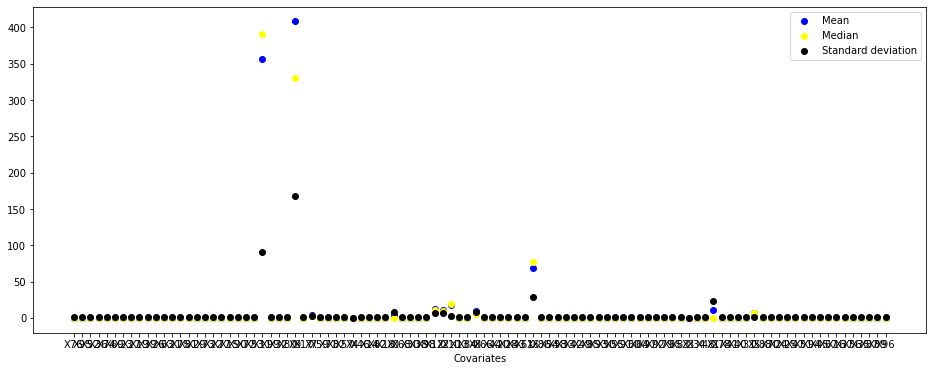

In [3]:
index = data.columns
X_mean = data.mean(axis=0)[:"X96"]
X_median = data.median(axis=0)[:"X96"]
X_var = data.std()[:"X96"]

plt.figure(figsize=(16, 6))
# we plot the mean to determine is the data is centered
plt.scatter(index[:-1], X_mean, c='blue', label='Mean')
plt.scatter(index[:-1], X_median, c='yellow', label='Median')
plt.scatter(index[:-1], X_var, c='black', label='Standard deviation')
plt.legend()
plt.xlabel("Covariates")
plt.show()

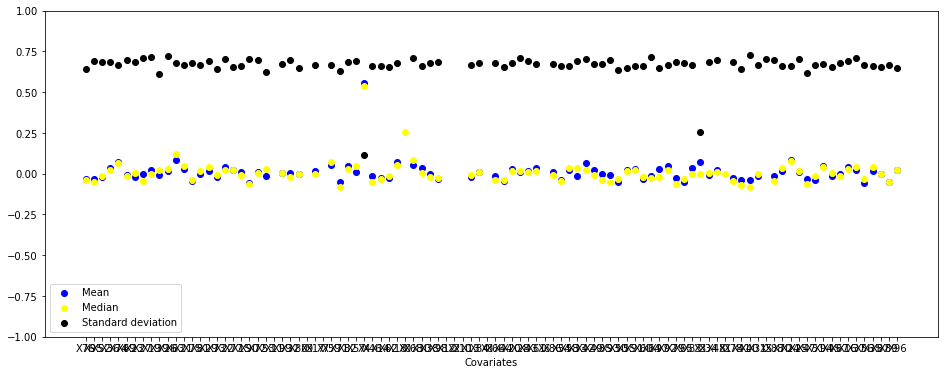

In [4]:
# Let's zoom !
plt.figure(figsize=(16, 6))
# we plot the mean to determine is the data is centered
plt.scatter(index[:-1], X_mean, c='blue', label='Mean')
plt.scatter(index[:-1], X_median, c='yellow', label='Median')
plt.scatter(index[:-1], X_var, c='black', label='Standard deviation')
plt.legend()
plt.xlabel("Covariates")
plt.ylim(-1, 1)
plt.show()

As the mean is equal to 0 for most of the covariates (more thatn 90 of them), we can consider that the data is **centered**. <br>
We have considered that the mean is equal to 0 but the standard deviation is not equal to 1 : the data is **not normalized**.
As the standard deviation equals to 0.7 and not 1 : the data is **not standardized**.

*Separate the data frame in two matrices, X and Y , containing the input and output data respectively.*

In [5]:
X = data.copy()
del X['Y']
Y = data['Y']

*Separate the covariate data in train and test sets. Save one fourth of the data as testing.*

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, Y, test_size=0.25, train_size=None)

*Center and standarize the train and test data and plot its mean and variance again. You can
use the function fit_transform.*

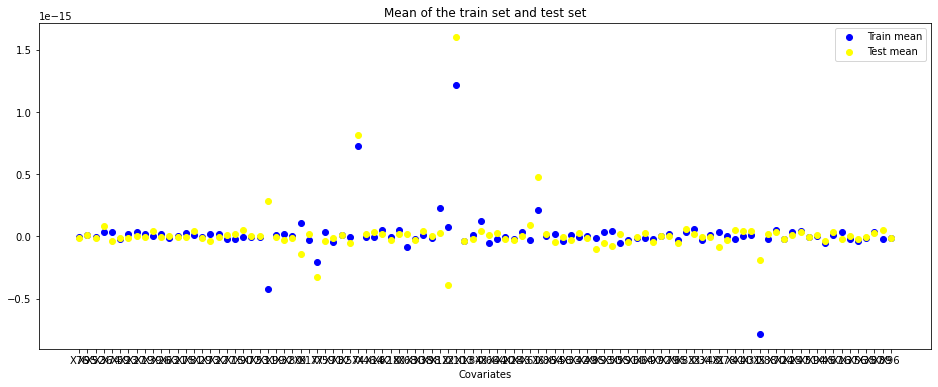

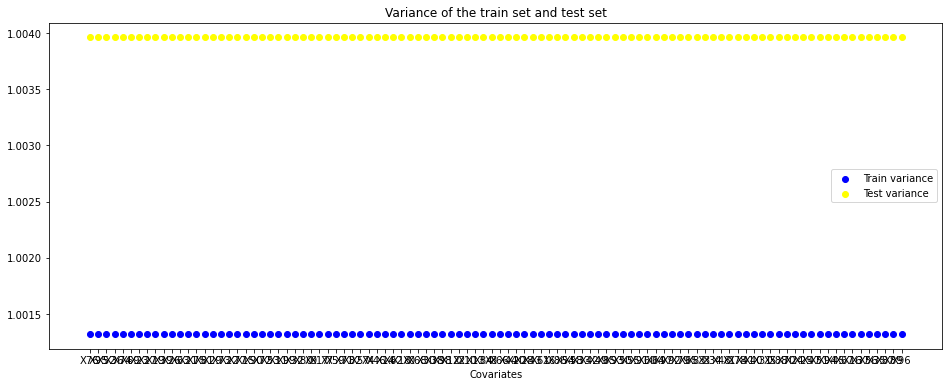

In [7]:
import sklearn.preprocessing
scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(
    scaler.fit_transform(X_test), columns=X_test.columns)
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

plt.figure(figsize=(16, 6))
plt.scatter(X.columns, X_train_scaled.mean(
    axis=0), c='blue', label='Train mean')
plt.scatter(X.columns, X_test_scaled.mean(
    axis=0), c='yellow', label='Test mean')
plt.legend()
plt.xlabel("Covariates")
plt.title('Mean of the train set and test set')
plt.show()

plt.figure(figsize=(16, 6))
plt.scatter(X.columns, X_train_scaled.std(
    axis=0), c='blue', label='Train variance')
plt.scatter(X.columns, X_test_scaled.std(axis=0),
            c='yellow', label='Test variance')
plt.legend()
plt.xlabel("Covariates")
plt.title('Variance of the train set and test set')
plt.show()

*Why is it important the the variables are scaled? You can elaborate the answer focussing on
the Lasso method.* <br>
As the data is centered, we don't need to compute the intercept and as it is standardized, we don't have extra-values that distorts the regulation.

*Create two empty dataFrames of names df_test and df_coef*

In [8]:
df_test = pd.DataFrame()
df_coef = pd.DataFrame()

# Question 2

*Write a function to compute the determination coefficient and another to compute the mean squared error.*

In [9]:
def R2(Y, Yhat):
    '''Determination coefficient'''
    Ybar = np.mean(Y)
    return 1 - np.sum((Y-Yhat)**2)/np.sum((Y-Ybar)**2)


def MSE(Y, Yhat):
    '''Mean squared error'''
    return np.mean((Y-Yhat)**2)

# Question 3

*Using sklearn utilities, fit a linear regression model on the train set that we will use as baseline.<br> 
Apply the linear regression of the sklearn library to the low dimensional data and print the determination coefficient and the MSE of the test data.*

In [10]:
reg_lin = sklearn.linear_model.LinearRegression().fit(X_train_scaled, Y_train)
Yhat_lin = reg_lin.predict(X_test_scaled)

print('The determination coefficient R^2 :',
      R2(Y_test, Yhat_lin), '(train data)')
print('The Mean Squared Error is :', MSE(Y_test, Yhat_lin), '(test data)')

The determination coefficient R^2 : 0.5384852478771166 (train data)
The Mean Squared Error is : 37.70530085856645 (test data)


*Add a column named OLS to the df_test dataframe that contains the predicted values for the sample. <br>
Add a column named OLS to the df_coef dataframe that contains the estimated coefficients.*

In [11]:
df_test['OLS'] = reg_lin.predict(X_test_scaled)
df_coef['OLS'] = reg_lin.coef_

# Question 4

*Plot a heatmap of the covariance matrix. Compute the singular value decomposition of the covariance matrix.*

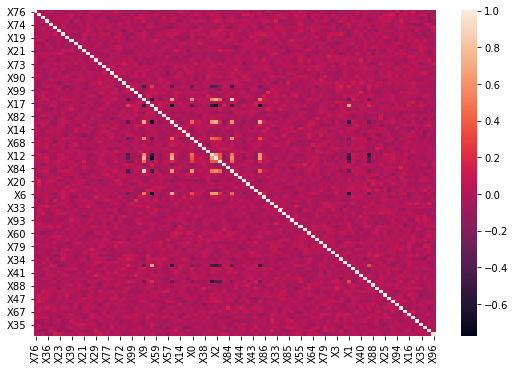

In [12]:
import seaborn as sn
plt.figure(figsize=(9, 6))
M = X_train_scaled.cov()
sn.heatmap(M)

We can see that the covariates are indepedent as there is no correlation bewteen them (the covariance equals to 0)
The diagonal is pink as Covariance(Xi,Xi) = Var(Xi) = 1

In [13]:
from numpy.linalg import svd
U, s, V = svd(M)
s = np.diag(s)

# Question 5

*In PCA we transform the data to a new coordinate system such that the greatest variance by some scalar projection of the data lies on the first coordinate (called the first principal component, PC1), the second greatest variance in the second PC and so on. The PCs are computed given the above SVD, as Us. Instead of using the whole transformation, Us, we will use (as an approximation) the first 2 PCs, i.e., the first 2 columns in Us. Such extreme reduction reduction (from p “ 100 to 2 dimensions) has a cost in the quality of the approximation. However, this 2D data can be plot. Plot the first 2 PC of the train data.*

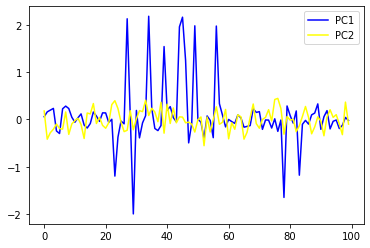

In [14]:
Us = U.dot(s)
n, p = Us.shape
PC1 = Us[:, 0]
PC2 = Us[:, 1]
plt.plot(PC1, c='blue', label='PC1')
plt.plot(PC2, c='yellow', label='PC2')
plt.legend()
plt.show()

We observe that PC1 (blue) is more important than PC2 (yellow) : indeed, the principal component PC1 has the greatest variances.

# Question 6

*We will apply the method "PCA before OLS", which consists in applying OLS with output Y and input X•U[:,2] where U[:,2] contains the eigenvectors (associated with the 2 largest eigenvalues) of the covariance matrix.* <br>
*Compute projected data for both the train and the test data, apply the linear regression of the sklearn library to the low dimensional data and print the determination coefficient and the MSE of the test data.*

In [15]:
P_train = U[:, :2]
projected_train = X_train_scaled.dot(P_train)
projected_test = X_test_scaled.dot(P_train)


reg_PCA = sklearn.linear_model.LinearRegression().fit(projected_test, Y_test)
Yhat_PCA = reg_PCA.predict(projected_test)
print('The determination coefficient R^2 :',
      R2(Y_test, Yhat_PCA), '(test data)')
print('The Mean Squared Error is :', MSE(Y_test, Yhat_PCA), '(test data)')

The determination coefficient R^2 : 0.24075944834085106 (test data)
The Mean Squared Error is : 62.0292055511799 (test data)


*Add a column named pca_ols to the df_test dataframe that contains the predicted values for the test sample.*

In [16]:
df_test['PCA_OLS'] = reg_PCA.predict(projected_test)

# Question 7

*Compute and plot the absolute values of the loadings on the first two PC.*

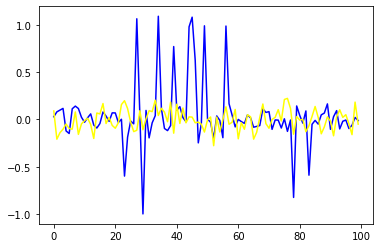

In [17]:
loadings = U.dot(s**1/2)
loadings1 = loadings[:, 0]
loadings2 = loadings[:, 1]
plt.plot(loadings1,  c='blue', label='loadings 1')
plt.plot(loadings2,  c='yellow', label='loadings 2')
plt.show()

We can observer that Loadings(i,1) are more important than Loadings(i,2) : indeed, the variables have more weight in the first principal component than in the second principal component.

# Question 8

*Using sklearn utilities, fit a Lasso model on the train set. <br>
• apply the LassoCV of the sklearn library: it uses cross-validation internally for different values of the regularization parameter alpha: try 30 different values for alpha, spaced evenly on a log scale beteween 10e-3 and 10e1 (see function np.logspace), <br>
• print the determination coefficient and the MSE of the test data, <br>
• print the regulatization parameter that the algorithm selects*

In [18]:
from sklearn.linear_model import LassoCV
alpha_values = np.logspace(-3, 1, 30)

reg_lasso = LassoCV(alphas=alpha_values).fit(X_train_scaled, Y_train)

In [19]:
Yhat_Lasso = reg_lasso.predict(X_test_scaled)
print('The determination coefficient R^2 :',
      R2(Y_test, Yhat_Lasso), '(test data)')
print('The Mean Squared Error is :', MSE(Y_test, Yhat_Lasso), '(test data)')
print("The regularization parameter selected by the algorithm is :", reg_lasso.alpha_)

The determination coefficient R^2 : 0.5765330130478756 (test data)
The Mean Squared Error is : 34.59683590449803 (test data)
The regularization parameter selected by the algorithm is : 0.2212216291070448


*Add a column named lasso to the df_coef dataframe that contains the predicted values for the sample and add a column named lasso to the df_coef dataframe that contains the estimated coefficients.*

In [20]:
df_test['lasso'] = reg_lasso.predict(X_test_scaled)
df_coef['lasso'] = reg_lasso.coef_

# Question 9

*Using sklearn utilities, fit a Ridge model on the train set. <br>
• apply the RidgeCV of the sklearn library: it uses crossvalidation internally for different values of the regularization parameter alpha: try 30 different values for alpha, spaced evenly on a log scale beteween 10e-1 and 10e2 (see function np.logspace) <br>
• print the determination coefficient and the MSE of the test data, <br>
• print the regulatization parameter that the algorithm selects*

In [21]:
from sklearn.linear_model import RidgeCV

alpha_values_r = np.logspace(-1, 2, 30)
reg_ridge = RidgeCV(alphas=alpha_values_r).fit(X_train_scaled, Y_train)

In [22]:
Yhat_ridge = reg_ridge.predict(X_test_scaled)
print('The determination coefficient R^2 :', R2(Y_test, Yhat_ridge))
print('The Mean Squared Error is :', MSE(Y_test, Yhat_ridge))
print("The regularization parameter selected by the algorithm is :", reg_ridge.alpha_)

The determination coefficient R^2 : 0.5355691501139901
The Mean Squared Error is : 37.94354317473493
The regularization parameter selected by the algorithm is : 48.93900918477494


In [23]:
df_test['ridge'] = reg_ridge.predict(X_test_scaled)
df_coef['ridge'] = reg_ridge.coef_

# Question 10

*Program the method of the forward variable selection. You can use the test statistics of the test for nullity (as seen during the course). For the moment, do not define the stop criterion for the method, i.e. add a variables at each time until all the variables are used. Provide the order of the variable selection.*

In [24]:
def forward_variable_selection(Y, X):
    X_copy = X.copy()
    n, p = X.shape
    r = Y.copy().to_numpy().reshape(n, 1)
    A = [i for i in range(p)]
    test_stat = []
    test_stat_withk = []
    selection = []
    test_result = []
    while A != []:
        for k in A:
            X_k = X_copy.to_numpy()[:, [k]]
            reg_OLS = sklearn.linear_model.LinearRegression().fit(X_k, r)
            theta_hat = reg_OLS.coef_
            Gram = (X_k.T.dot(X_k))/n
            sn = 1/Gram
            sigma = (np.linalg.norm(r-reg_OLS.predict(X_k))**2)/(n-2)
            T = np.sqrt(n)*np.abs(theta_hat)/np.sqrt(sn*sigma)
            test_stat.append(T[0][0])
            test_stat_withk.append([T[0][0], k])
        i_max = test_stat.index(max(test_stat))
        k_star = test_stat_withk[i_max][1]
        selection.append(k_star)
        X_kstar = X_copy.to_numpy()[:, [k_star]]
        theta_hat_star = sklearn.linear_model.LinearRegression().fit(X_kstar, Y).coef_
        r = r-X_kstar*theta_hat_star
        A.remove(k_star)
        test_result.append(list(test_stat))
        test_stat = []
        test_stat_withk = []
    return selection, test_result

# Question 11

*Stop criterion: We choose to stop if the p-value is larger than 0.05. Illustrate the method providing (i) the 3 graphs of the test statistics obtained when selecting the 1st, 2nd and 3rd variables (in abscissa: the indices of the variables; in the ordinate: the value of the test statics), (ii) the graphs of the first 50 p-values (each associated to a selected variable). On the same plot, trace the horizontal line with the ordinate 0.05. Finally, provide the list of the selected variables.*

In [41]:
import scipy.stats


def FVS_withcriterion(Y, X):
    selection, test_result = forward_variable_selection(Y, X)
    n, p = X.shape
    p_values = []
    selected_var = []
    selected_test = []
    p_val = 2*(1 - scipy.stats.norm.cdf(max(test_result[0])))
    k = 0
    while p_val < 0.05 and k <= p:
        p_values.append(p_val)
        selected_var.append(selection[k])
        selected_test.append(test_result[k])
        p_val = 2*(1 - scipy.stats.norm.cdf(max(test_result[k])))
        k += 1
    all_p_values = p_values.copy()
    for i in range(k-1, p):
        p_val = 2*(1 - scipy.stats.norm.cdf(max(test_result[i])))
        all_p_values.append(p_val)
    return selected_var, p_values, selected_test, selection, all_p_values

In [42]:
selected_var, p_values, selected_test, selection, all_p_values = FVS_withcriterion(
    Y, X_scaled)

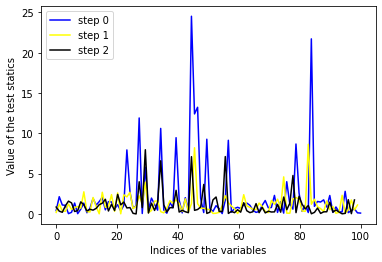

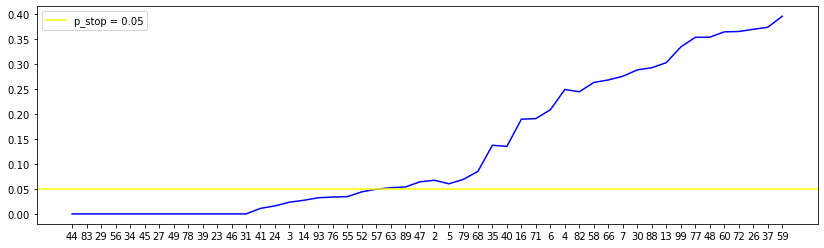

In [36]:
# Test statistics of the 3 first variables
plt.plot(np.linspace(0, 100, 100), selected_test[0], c='blue', label='step 0')
plt.plot(np.linspace(0, 99, 99), selected_test[1], c='yellow', label='step 1')
plt.plot(np.linspace(0, 98, 98), selected_test[2], c='black', label='step 2')
plt.xlabel('Indices of the variables')
plt.ylabel('Value of the test statics')
plt.legend()
plt.show()

# Graph of the first 50 p-values
selection_str = [str(var) for var in selection]
plt.figure(figsize=(14, 4))
plt.plot(selection_str[:50], all_p_values[:50], c='blue')
plt.axhline(y=0.05, c='yellow', label='p_stop = 0.05')
plt.legend()
plt.show()

In [28]:
print('The selected variables are :', selected_var)

The selected variables are : [44, 83, 29, 56, 34, 45, 27, 49, 78, 39, 23, 46, 31, 41, 24, 3, 14, 93, 76, 55, 52, 57]


# Question 12

*Run the OLS on the selected variables. <br>
• apply the OLS of the sklearn library. <br>
• print the determination coefficient and the MSE of the test data*

In [29]:
Xtrain_selected = X_train_scaled[index[selected_var[0]]]
Xtest_selected = X_test_scaled[index[selected_var[0]]]
for i in selected_var[1:]:
    Xtrain_selected = np.column_stack(
        (Xtrain_selected, X_train_scaled[index[i]]))
    Xtest_selected = np.column_stack((Xtest_selected, X_test_scaled[index[i]]))

reg_FVS = sklearn.linear_model.LinearRegression().fit(Xtrain_selected, Y_train)
Yhat_FVS = reg_FVS.predict(Xtest_selected)

print('The determination coefficient R^2 :',
      R2(Y_test, Yhat_FVS), '(train data)')
print('The Mean Squared Error is :', MSE(Y_test, Yhat_FVS), '(test data)')

The determination coefficient R^2 : 0.6107706637533141 (train data)
The Mean Squared Error is : 31.799653550952513 (test data)


*Add a column named FVS to the df_coef dataframe that contains the predicted values for the sample and add a column named FVS to the df_coef dataframe that contains the estimated coefficients.*

In [30]:
df_test['FVS'] = reg_FVS.predict(Xtest_selected)

coef = [0]*100  # We set the coefficient of the no-selected variables to 0
for i in range(0, len(selected_var)):
    coef[selected_var[i]] = reg_FVS.coef_[i]

df_coef['FVS'] = coef

# Question 13
*Summarize the results of all the methods*

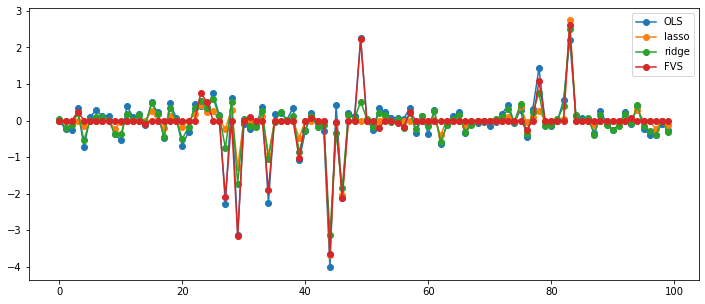

In [31]:
df_coef.plot(marker='o', figsize=(12, 5))

We can see that most of the coefficients of Lasso and FVS equal to zero.
All four methods have substantially similar most remarkable coefficients.

# Question 14
*How many coefficients are set exactly to zero by each of the methods considered in the data frame df_coef?*

In [32]:
print('The number of coefficients set exactly to zero by')
print('   - OLS :', len(df_coef['OLS'].loc[df_coef['OLS'] == 0]))
print('   - Lasso :', len(df_coef['lasso'].loc[df_coef['lasso'] == 0]))
print('   - Ridge :', len(df_coef['ridge'].loc[df_coef['ridge'] == 0]))
print('   - FVS :', len(df_coef['FVS'].loc[df_coef['FVS'] == 0]))

The number of coefficients set exactly to zero by
   - OLS : 0
   - Lasso : 61
   - Ridge : 0
   - FVS : 78


Both Lasso and Ridge methds shrink the estimated coefficient but the penalty term of Lasso tends to set the coefficients to zero in order to keep only the significant parameters (by keeping their coefficient).

# Question 15

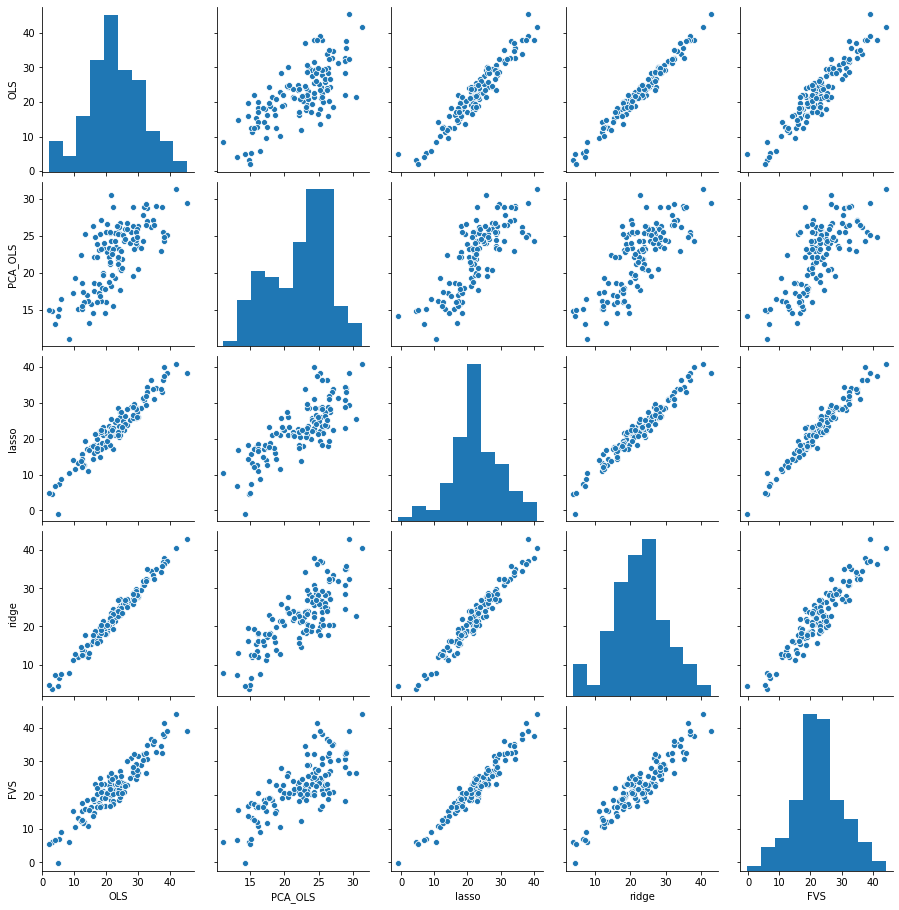

In [33]:
sn.pairplot(df_test)

To predict the value of a new and unseen data point x, we shoud use the equation $x^T \hat\theta_{OLS}$.